## EDA For Literacy Rate Affecting The Status Of The Countries


In [263]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns;

## Initial Exploration of Literacy Rate Dataset

Imports and cleans the Literacy Rate Dataset for Time Period = 2018

In [264]:
edu = pd.read_excel("Literacy-rate_2021-1.xlsx", sheet_name = 2, nrows = 203, header = 0)
# Cleaning the data by dropping some columns
edu = edu.drop(columns = ['Gender','Source'])
edu = edu.drop([0])
edu = edu.drop(columns=edu.columns[6])
# Renaming column names
edu = edu.rename(columns={"Unnamed: 9": "Time period"})
edu = edu.rename(columns={"Region": "Region_UNICEF"})
edu = edu.rename(columns={"Total": "Total_LiteracyRate"})
edu = edu.reset_index(drop=True)
# Cleaning the data by dropping the countries marked as "Not Classified" in Development Regions
edu = edu[edu['Development Regions'] != 'Not Classified']
edu = edu.dropna()
edu = edu.rename(columns={"Countries and areas": "Country/Territory"})
edu.head()

,ISO3,Country/Territory,Region_UNICEF,Sub-region,Development Regions,Total_LiteracyRate,Time period
0,AFG,Afghanistan,SA,SA,Least Developed,65.420547,2018
1,ALB,Albania,ECA,EECA,More Developed,99.330002,2018
2,DZA,Algeria,MENA,MENA,Less Developed,97.426521,2018
7,ARG,Argentina,LAC,LAC,Less Developed,99.505524,2018
13,BHR,Bahrain,MENA,MENA,Less Developed,99.687202,2018


##### Plot barplot to the number of different Development Regions and scatterplot the mean Literacy Rate for each Region.

Less Developed     46
Least Developed    20
More Developed     12
Name: Development Regions, dtype: int64


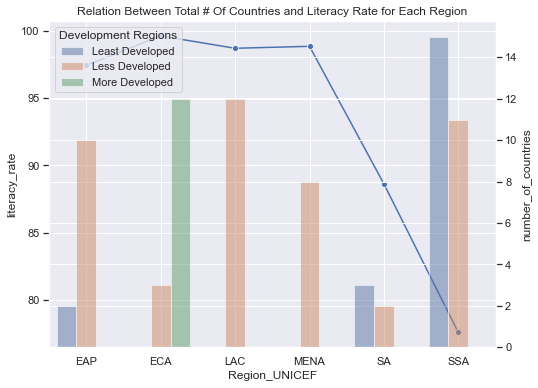

In [278]:
print(edu['Development Regions'].value_counts())

edu_grp = edu.groupby(['Region_UNICEF','Development Regions']).agg(number_of_countries = ('Country/Territory','count'))
edu_grp = edu_grp.reset_index()

region_label = ['East Asia and the Pacific', 'Europe and Central Asia', 'Latin America and the Caribbean', 
                'Middle East and North Africa', 'South Asia', 'Sub-Saharan Africa']

fig, ax1 = plt.subplots(figsize=(8,6))

edu_grp2 = edu.groupby(['Region_UNICEF']).agg(literacy_rate = ('Total_LiteracyRate','mean'))
sns.lineplot(data = edu_grp2['literacy_rate'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

ax2 = sns.barplot(data=edu_grp, x='Region_UNICEF', y='number_of_countries', hue = 'Development Regions', alpha=0.5, ax=ax2)
ax2 = ax2.set(title = "Relation Between Total # Of Countries and Literacy Rate for Each Region")


### Import and clean All Data FIW To Compare The Status of the Countries

In [280]:
allData = pd.read_excel("All_data_FIW_2013-2022.xlsx", sheet_name = 1, header=1)
allData = allData[allData['Edition'] == 2018]
allData = allData.reset_index(drop = True)
allData = allData.drop(columns=allData.columns[7:-1])
allData.head()

,Country/Territory,Region,C/T,Edition,Status,PR rating,CL rating,Total
0,Abkhazia,Eurasia,t,2018,PF,4,5,41
1,Afghanistan,Asia,c,2018,NF,5,6,26
2,Albania,Europe,c,2018,PF,3,3,68
3,Algeria,Africa,c,2018,NF,6,5,35
4,Andorra,Europe,c,2018,F,1,1,96


Number of Countries Free, Partially Free and Not Free for 2018 Edition

In [283]:
allData['Status'].value_counts()

F     89
PF    63
NF    57
Name: Status, dtype: int64

## EDA Visualizations Comparing the Status and Literacy Rate


Merge the two dataset on the countries and clean the data by dropping the NA values.

In [287]:
allData_merged = allData.merge(edu, how='left', on='Country/Territory')
allData_merged = allData_merged.dropna()
allData_merged.head()

,Country/Territory,Region,C/T,Edition,Status,PR rating,CL rating,Total,ISO3,Region_UNICEF,Sub-region,Development Regions,Total_LiteracyRate,Time period
1,Afghanistan,Asia,c,2018,NF,5,6,26,AFG,SA,SA,Least Developed,65.420547,2018
2,Albania,Europe,c,2018,PF,3,3,68,ALB,ECA,EECA,More Developed,99.330002,2018
3,Algeria,Africa,c,2018,NF,6,5,35,DZA,MENA,MENA,Less Developed,97.426521,2018
7,Argentina,Americas,c,2018,F,2,2,83,ARG,LAC,LAC,Less Developed,99.505524,2018
13,Bahrain,Middle East,c,2018,NF,7,6,12,BHR,MENA,MENA,Less Developed,99.687202,2018


### Relation of the Literacy Rate for Each Region

Plot a bargraph for the total number of countries in each region based on the status of the country.
Status: F -> Free
        NF -> Not Free
        PF -> Partially Free

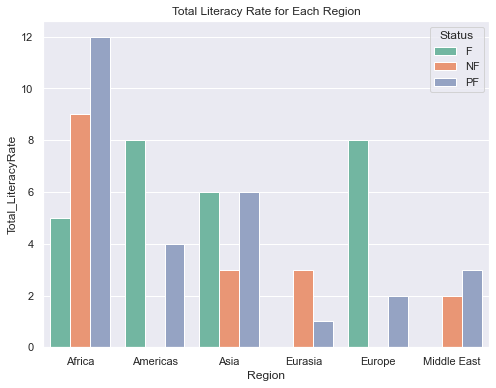

In [289]:
allData_grp = allData_merged.groupby(['Region','Status']).count()
allData_grp = allData_grp.reset_index()

ax = sns.barplot(data=allData_grp, x='Region', y='Total_LiteracyRate', hue='Status', palette='Set2')
ax = ax.set(title = "Total Literacy Rate for Each Region")
ax = sns.set(rc={'figure.figsize':(8,6)})


From the barplot, we can see that there is a direct relationship between the literacy rate and status of the country for each region. A more number of free countries in the region has a higher literacy rate. 

### Number of Countries for Each Status in Each Development Regions

Plots barchart for finding the realtionship between the development regions and status of the region.
Calculates the total number of countries in each development regions for each status.

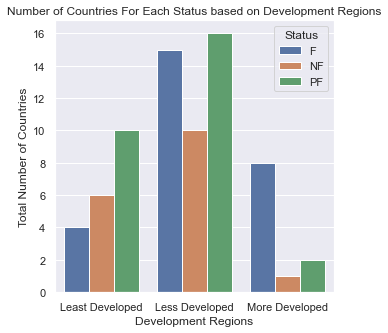

In [295]:
allData_grp2 = allData_merged.groupby(['Development Regions','Status']).agg(val = ('Country/Territory','count'))
allData_grp2 = allData_grp2.reset_index()

ax = sns.barplot(data=allData_grp2, x='Development Regions', y='val', hue='Status')
ax = ax.set(ylabel = "Total Number of Countries", title = "Number of Countries For Each Status based on Development Regions")
ax = sns.set(rc={'figure.figsize':(5,6)})

More Developed Country, we see that the total number of free countries is more than the other status.
To the contray, analysing the Less and Least Developed Countries, the number of countries not free is more than in Less Developed than in Least Developed.
